#load modules that needed for the pipeline when use shell, but not working for notebook, so using the full path of the software will work
module load mash/2.1 
module load circlator/1.5.5 
module load pggb/0.4.0 
module load odgi/0.6.2 
module load vg/1.41.0 
module load samtools/1.9 
module load pgge/20210412

!/opt/bioinf/mash/mash-2.1/bin/mash 
!/opt/bioinf/circlator/1.5.5/bin/circlator 
!/opt/bioinf/pggb/0.4.0/bin/pggb 
!/opt/bioinf/odgi/0.6.2/bin/odgi 
!/opt/bioinf/vg/1.41.0/bin/vg 
!/opt/bioinf/samtools/1.9/bin/samtools 
!/opt/bioinf/pgge/20210412/bin/pgge

In [77]:
#check circlator, which is use to reset the startpoint of genomes
!/opt/bioinf/circlator/1.5.5/bin/circlator

Usage: circlator <command> [options] <required arguments>

To get minimal usage for a command use:
circlator command

To get full help for a command use one of:
circlator command -h
circlator command --help


Available commands:

all        Run mapreads, bam2reads, assemble, merge, clean, fixstart
mapreads   Map reads to assembly
bam2reads  Make reads from mapping to be reassembled
assemble   Run assembly using reads from bam2reads
merge      Merge original assembly and new assembly made by assemble
clean      Remove small and completely contained contigs from assembly
fixstart   Change start position of circular sequences
minimus2   Run the minimus2 based circularisation pipeline
get_dnaa   Download file of dnaA (or other of user's choice) genes
progcheck  Checks dependencies are installed
test       Run Circlator on a small test set
version    Print version and exit


In [78]:
#check 
!/opt/bioinf/mash/mash-2.1/bin/mash


Mash version 2.1

Type 'mash --license' for license and copyright information.

Usage:

  mash <command> [options] [arguments ...]

Commands:

  bounds    Print a table of Mash error bounds.

  dist      Estimate the distance of query sequences to references.

  info      Display information about sketch files.

  paste     Create a single sketch file from multiple sketch files.

  screen    Determine whether query sequences are within a larger pool of
            sequences.

  sketch    Create sketches (reduced representations for fast operations).

  triangle  Estimate a lower-triangular distance matrix.



In [80]:
#check pggb
!/opt/bioinf/pggb/0.4.0/bin/pggb

ERROR: mandatory arguments -i and -n
ERROR: -n must be greater than or equal to 2
usage: /opt/conda/envs/pggb_0.4.0_singularity/bin/pggb -i <input-fasta> -n <n-mappings> [options]
options:
   [wfmash]
    -i, --input-fasta FILE      input FASTA/FASTQ file
    -s, --segment-length N      segment length for mapping [default: 5k]
    -l, --block-length N        minimum block length filter for mapping [default: 5*segment-length]
    -N, --no-split              disable splitting of input sequences during mapping [enabled by default]
    -p, --map-pct-id PCT        percent identity for mapping/alignment [default: 90]
    -n, --n-mappings N          number of mappings to retain for each segment
    -x, --sparse-map N          keep this fraction of mappings ('auto' for giant component heuristic) [default: 1.0]
    -K, --mash-kmer N           kmer size for mapping [default: 19]
    -F, --mash-kmer-thres N     ignore the top % most-frequent kmers [default: 0.001]
    -Y, --exclude-delim C       

In [81]:
!/opt/bioinf/vg/1.41.0/bin/vg

vg: variation graph tool, version v1.41.0 "Salmour"

usage: /opt/conda/envs/vg_1.41.0_singularity/bin/vg <command> [options]

main mapping and calling pipeline:
  -- autoindex     mapping tool-oriented index construction from interchange formats
  -- construct     graph construction
  -- rna           construct splicing graphs and pantranscriptomes
  -- index         index graphs or alignments for random access or mapping
  -- map           MEM-based read alignment
  -- giraffe       fast haplotype-aware short read alignment
  -- mpmap         splice-aware multipath alignment of short reads
  -- augment       augment a graph from an alignment
  -- pack          convert alignments to a compact coverage index
  -- call          call or genotype VCF variants
  -- help          show all subcommands

For more commands, type `vg help`.
For technical support, please visit: https://www.biostars.org/t/vg/



In [3]:
!/opt/bioinf/samtools/1.9/bin/samtools faidx ./4Sim.fa

In [4]:
!cat 4Sim_genomes.fa.fai

NC_017518	2248966	11	60	61
NMI01191Sim	2249014	2286473	60	61
NMI97349Sim	2248965	4572984	60	61
SimNC_017518	2249050	6859446	60	61


In [5]:
#Mash version 2.1 to calculate the distance for the genomes, which can be used as a guide for the similary -p for building the Pangenome graph
!/opt/bioinf/mash/mash-2.1/bin/mash triangle ./4Sim.fa

	4
NC_neisseria
Sim1_3k	0.0010072
Sim2_4k	0.00121124	0.000830728
Sim3_5k	0.00251903	0.00366686	0.00375609
Max p-value: 0


In [6]:
#pggb build the pangenome graph 
!/opt/bioinf/pggb/0.4.0/bin/pggb -i ./4Sim.fa -s 1000 -p 96 -n 4 -t 48 -S -m -o 4Sim_1k96 

[wfmash::map] Reference = [./4Sim.fa]
[wfmash::map] Query = [./4Sim.fa]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 40
[wfmash::map] Segment length = 1000 (read split allowed)
[wfmash::map] Block length min = 5000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 96%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = 4Sim_1k96/wfmash-ErivBZ
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 48
[wfmash::skch::Sketch::build] minimizers picked from reference = 448670
[wfmash::skch::Sketch::index] unique minimizers = 111103
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 7096) ... (582, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, ignore minimizers occurring >= 582 times during lookup.
[wfmash::map] time spent computing the reference index: 0.863418 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 1.06e+06 bp/s elapsed: 

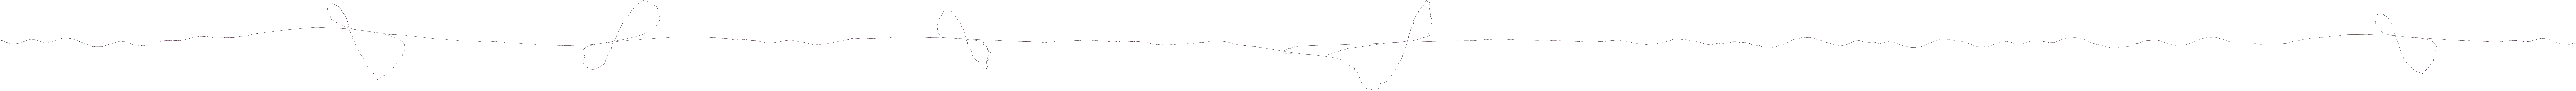

In [7]:
from IPython import display
display.Image("/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/4Sim_1k96/4Sim.fa.714ac4e.417fcdf.7659dc8.smooth.final.og.lay.draw_multiqc.png")

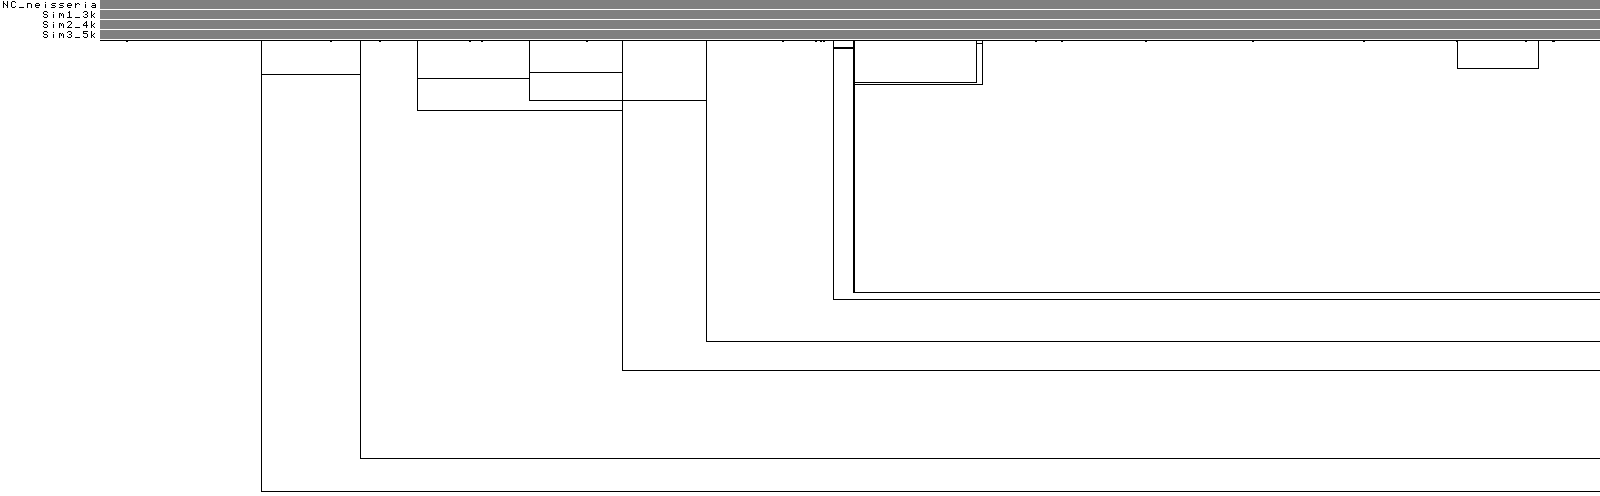

In [8]:
display.Image("/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/4Sim_1k96/4Sim.fa.714ac4e.417fcdf.7659dc8.smooth.final.og.viz_depth_multiqc.png")

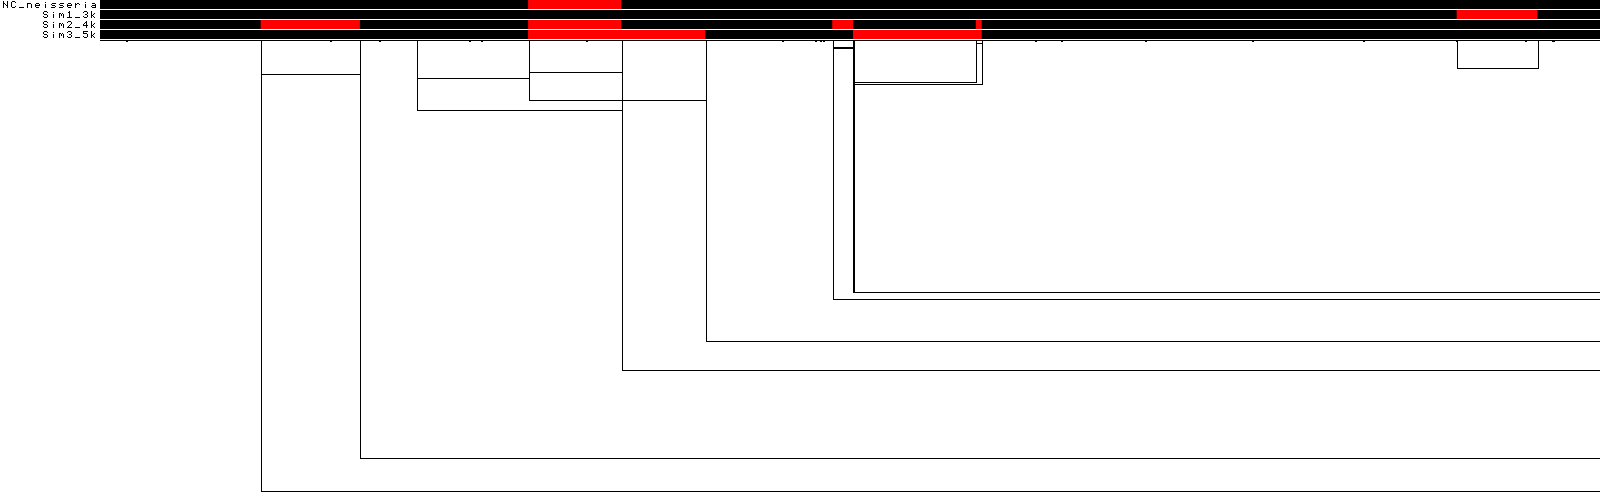

In [9]:
display.Image("/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/4Sim_1k96/4Sim.fa.714ac4e.417fcdf.7659dc8.smooth.final.og.viz_inv_multiqc.png")

In [10]:
!/opt/bioinf/pggb/0.4.0/bin/pggb -i ./4Sim.fa -s 10000 -p 95 -n 4 -t 48 -S -m -o 4Sim_10k95 

[wfmash::map] Reference = [./4Sim.fa]
[wfmash::map] Query = [./4Sim.fa]
[wfmash::map] Kmer size = 19
[wfmash::map] Window size = 256
[wfmash::map] Segment length = 10000 (read split allowed)
[wfmash::map] Block length min = 50000
[wfmash::map] Chaining gap max = 100000
[wfmash::map] Percentage identity threshold = 95%
[wfmash::map] Skip self mappings
[wfmash::map] Mapping output file = 4Sim_10k95/wfmash-58d8Lt
[wfmash::map] Filter mode = 1 (1 = map, 2 = one-to-one, 3 = none)
[wfmash::map] Execution threads  = 48
[wfmash::skch::Sketch::build] minimizers picked from reference = 70228
[wfmash::skch::Sketch::index] unique minimizers = 17589
[wfmash::skch::Sketch::computeFreqHist] Frequency histogram of minimizers = (1, 1132) ... (300, 1)
[wfmash::skch::Sketch::computeFreqHist] With threshold 0.001%, consider all minimizers during lookup.
[wfmash::map] time spent computing the reference index: 0.505419 sec
[wfmash::skch::Map::mapQuery] mapped 100.00% @ 5.99e+06 bp/s elapsed: 00:00:00:01 rem

In [11]:
!pwd

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline


In [12]:
!mkdir pgge

mkdir: cannot create directory ‘pgge’: File exists


In [13]:
!cd ./pgge

In [14]:
!pwd

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline


In [15]:
%cd ./pgge

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pgge


In [16]:
!pwd 

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pgge


In [18]:
!/opt/bioinf/pgge/20210412/bin/pgge -g *.gfa -f /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/4Sim.fa -o /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pgge -r /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pgge/scripts/beehave.R -b /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pgge/pgge_4Sim_peanut_bed -l 100000 -s 5000 -t 16

/usr/local/bin/pgge: line 257: file: command not found
samtools faidx /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/4Sim.fa NC_neisseria
0.01s user 0.04s system 88% cpu 0.06s total 3624Kb max memory
samtools faidx /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/4Sim.fa Sim1_3k
0.02s user 0.00s system 81% cpu 0.03s total 3628Kb max memory
samtools faidx /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/4Sim.fa Sim2_4k
0.02s user 0.00s system 10% cpu 0.26s total 3624Kb max memory
samtools faidx /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/4Sim.fa Sim3_5k
0.01s user 0.01s system 85% cpu 0.03s total 3624Kb max memory
splitfa /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pgge/pgge-l100000-s5000.NC_neisseria.4Sim.fa -l 100000 -s 5000
0.00s user 0.09s system 43% cpu 0.21s total 7872Kb max memory
splitfa /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pgge/pgge-l100000-s5000.Sim1_3k

In [19]:
!pwd

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pgge


In [20]:
%cd ..

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline


In [21]:
!cd ./vg_deconstruct

In [22]:
!/opt/bioinf/vg/1.41.0/bin/vg 

vg: variation graph tool, version v1.41.0 "Salmour"

usage: /opt/conda/envs/vg_1.41.0_singularity/bin/vg <command> [options]

main mapping and calling pipeline:
  -- autoindex     mapping tool-oriented index construction from interchange formats
  -- construct     graph construction
  -- rna           construct splicing graphs and pantranscriptomes
  -- index         index graphs or alignments for random access or mapping
  -- map           MEM-based read alignment
  -- giraffe       fast haplotype-aware short read alignment
  -- mpmap         splice-aware multipath alignment of short reads
  -- augment       augment a graph from an alignment
  -- pack          convert alignments to a compact coverage index
  -- call          call or genotype VCF variants
  -- help          show all subcommands

For more commands, type `vg help`.
For technical support, please visit: https://www.biostars.org/t/vg/



In [26]:
%cd ./vg_deconstruct

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct


In [27]:
!pwd

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct


In [28]:
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct 

usage: /opt/conda/envs/vg_1.41.0_singularity/bin/vg deconstruct [options] [-p|-P] <PATH> <GRAPH>
Outputs VCF records for Snarls present in a graph (relative to a chosen reference path).
options: 
    -p, --path NAME          A reference path to deconstruct against (multiple allowed).
    -P, --path-prefix NAME   All paths (and/or GBWT threads) beginning with NAME used as reference (multiple allowed).
                             Other non-ref paths not considered as samples.  When using a GBWT, select only samples with given prefix.
    -H, --path-sep SEP       Obtain alt paths from the set of paths, assuming a path name hierarchy (e.g. SEP='#' and sample#phase#contig)
    -r, --snarls FILE        Snarls file (from vg snarls) to avoid recomputing.
    -g, --gbwt FILE          only consider alt traversals that correspond to GBWT threads FILE.
    -T, --translation FILE   Node ID translation (as created by vg gbwt --translation) to apply to snarl names in output
    -e, --path-traversals

In [33]:
#vg deconstruct to get the vcf file of variant in the graph 
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct -p NC_neisseria -p Sim1_3k -p Sim2_4k -p Sim3_5k -a -K 4Sim.1k96.gfa > 4Sim.1k96_aK_allpath 

In [31]:
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct -p NC_neisseria -p Sim1_3k -p Sim2_4k -p Sim3_5k -e 4Sim.1k96.gfa > 4Sim.1k96_e_allpath 

In [32]:
!/opt/bioinf/vg/1.41.0/bin/vg deconstruct -p NC_neisseria -a -e -K 4Sim.1k96.gfa > 4Sim.1k96_aeK_path1

In [35]:
!/opt/bioinf/vcflib/vcflib-1.0.0/bin/vcfstats 4Sim.1k96_aK_allpath > 4Sim.1k96_aK_allpath_stats
!/opt/bioinf/vcflib/vcflib-1.0.0/bin/vcfstats 4Sim.1k96_e_allpath > 4Sim.1k96_e_allpath_stats
!/opt/bioinf/vcflib/vcflib-1.0.0/bin/vcfstats 4Sim.1k96_aeK_path1 > 4Sim.1k96_aeK_path1_stats

/bin/bash: line 1: 294964 Segmentation fault      (core dumped) /opt/bioinf/vcflib/vcflib-1.0.0/bin/vcfstats 4Sim.1k96_e_allpath > 4Sim.1k96_e_allpath_stats
/bin/bash: line 1: 295311 Segmentation fault      (core dumped) /opt/bioinf/vcflib/vcflib-1.0.0/bin/vcfstats 4Sim.1k96_aeK_path1 > 4Sim.1k96_aeK_path1_stats


Build index for graph, then mapping NGS short read to the graph 

In [70]:
#use odgi to view some specific regions of the graph 
%cd ./vg_deconstruct/

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct


In [71]:
!pwd

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct


In [75]:
!/opt/bioinf/odgi/0.6.2/bin/odgi

odgi: optimized dynamic genome/graph implementation, version 

usage: /opt/conda/envs/odgi_0.6.2_singularity/bin/odgi <command> [options]

Overview of available commands:
  -- bin           Binning of pangenome sequence and path information in the graph.
  -- break         Break cycles in the graph and drop its paths.
  -- build         Construct a dynamic succinct variation graph in ODGI format from a GFAv1.
  -- chop          Divide nodes into smaller pieces preserving node topology and order.
  -- cover         Cover the graph with paths.
  -- crush         Crush runs of N.
  -- degree        Describe the graph in terms of node degree.
  -- depth         Find the depth of a graph as defined by query criteria. Without specifying any non-mandatory options, it prints in a tab-delimited format path, start, end, and mean.depth to stdout.
  -- draw          Draw previously-determined 2D layouts of the graph with diverse annotations.
  -- explode       Breaks a graph into connected compone

In [73]:
!/opt/bioinf/odgi/0.6.2/bin/odgi viz -i 4Sim.1k96.gfa -r NC_neisseria:50000-1000000  -o test_range.png

[odgi::viz] Path range to pangenomic range conversion.
[odgi::viz] Visualizing the graph in the pangenomic range [50491, 1.0056e+06]
[odgi::viz] Binned mode
[odgi::viz] bin width: 636.737
[odgi::viz] image width: 1500


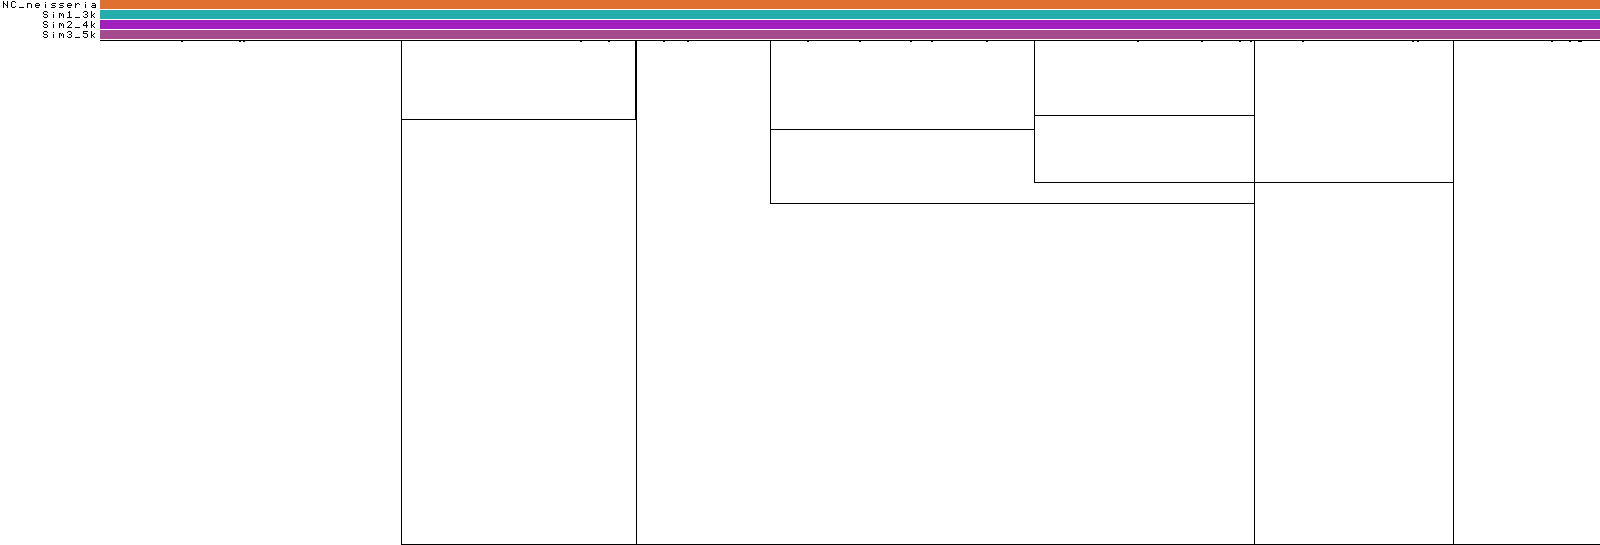

In [74]:
from IPython import display
display.Image("./test_range.png")

In [90]:
#Pangenomic phylogeny 
#Using odgi paths to extract distances of paths from a graph
#We can use the matrix for phylogenetic analysis
%cd ./pipeline/pangenome_phylogeny/
!pwd


[Errno 2] No such file or directory: './pipeline/pangenome_phylogeny/'
/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pangenome_phylogeny
/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pangenome_phylogeny


In [97]:
!/opt/bioinf/odgi/0.6.2/bin/odgi matrix

  odgi matrix {OPTIONS}

    Write the graph topology in sparse matrix formats.

  OPTIONS:

      [ MANDATORY OPTIONS ]
        -i[FILE], --idx=[FILE]            Load the succinct variation graph in
                                          ODGI format from this *FILE*. The file
                                          name usually ends with *.og*. It also
                                          accepts GFAv1, but the on-the-fly
                                          conversion to the ODGI format requires
                                          additional time!
      [ Matrix Options ]
        -e, --edge-depth-weight           Weigh edges by their path depth.
        -d, --delta-weight                Weigh edges by the inverse id delta.
      [ Threading ]
        -t[N], --threads=[N]              Number of threads to use for parallel
                                          operations.
      [ Processing Information ]
        -P, --progress                    Write the curre

In [94]:
!/opt/bioinf/odgi/0.6.2/bin/odgi matrix -i ./4Sim.fa.714ac4e.417fcdf.7659dc8.smooth.final.gfa -e -t 24 > 4Sim1k96_distance_matrix_e

In [96]:
!/opt/bioinf/odgi/0.6.2/bin/odgi matrix -i ./4Sim.fa.714ac4e.417fcdf.7659dc8.smooth.final.gfa -d -t 24 > 4Sim1k96_distance_matrix_d

In [98]:
!/opt/bioinf/odgi/0.6.2/bin/odgi paths

  odgi paths {OPTIONS}

    Interrogate the embedded paths of a graph. Does not print anything to stdout
    by default!

  OPTIONS:

      [ MANDATORY ARGUMENTS ]
        -i[FILE], --idx=[FILE]            Load the succinct variation graph in
                                          ODGI format from this *FILE*. The file
                                          name usually ends with *.og*. It also
                                          accepts GFAv1, but the on-the-fly
                                          conversion to the ODGI format requires
                                          additional time!
      [ Path Investigation Options ]
        -O[FILE], --overlaps=[FILE]       Read in the path grouping *FILE* to
                                          generate the overlap statistics from.
                                          The file must be tab-delimited. The
                                          first column lists a grouping and the
                           

In [100]:
!/opt/bioinf/odgi/0.6.2/bin/odgi paths -i ./4Sim.fa.714ac4e.417fcdf.7659dc8.smooth.final.og -d > 4Sim1k96_distance

/opt/bioinf/odgi/0.6.2/bin/odgi: line 2: 49321 Segmentation fault      singularity --silent exec -B /NGS /opt/bioinf/odgi/0.6.2/odgi_0.6.2.sif odgi $@


In [104]:
%pwd

'/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pangenome_phylogeny'

In [105]:
!cat list2dist_clustering_4Sim_genomes.R

#library(devtools)
#install_github("helixcn/spaa")
#library(spaa)
#install.packages("reshape")
setwd("/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pangenome_phylogeny")


library(reshape)
library(ape)

# read in the data
dat=read.csv("4Sim1k96_distance_cut.csv",sep=",")
dat
# use reshape's cast function to change to matrix
m <- cast(dat, path.a ~ path.b)
m
# set the row names
rownames(m) <- m[,1]
# get rid of a couple of rows
m <- m[,-2]
# convert any 0s that were read in as strings to integers
m <- apply(m, 2, as.numeric )
m

# change the matrix to a distance matrix
d <- dist(m)
# do hierarchical clustering
h <- hclust(d)
# plot the dendrogram
plot(h)

# use ape's as phylo function
tree <- as.phylo(h)
# export as newick for viewing in figtree
write.tree(phy=tree, file = '4Sim.tree')

In [ ]:
#convert the graph into 256 bp chunks

!/opt/bioinf/vg/1.41.0/bin/vg mod

#some gfa need huge temprary memory, so set -b $tem_dir will help
!/opt/bioinf/vg/1.41.0/bin/vg index -b $tem_dir -t 48 -x ${x}_256.xg -g ${x}_256.gcsa -k 16 ${x}_256.vg



In [39]:
!/opt/bioinf/vg/1.41.0/bin/vg mod

usage: /opt/conda/envs/vg_1.41.0_singularity/bin/vg mod [options] <graph.vg> >[mod.vg]
Modifies graph, outputs modified on stdout.

options:
    -P, --label-paths       don't edit with -i alignments, just use them for labeling the graph
    -c, --compact-ids       should we sort and compact the id space? (default false)
    -b, --break-cycles      use an approximate topological sort to break cycles in the graph
    -n, --normalize         normalize the graph so that edges are always non-redundant
                            (nodes have unique starting and ending bases relative to neighbors,
                            and edges that do not introduce new paths are removed and neighboring
                            nodes are merged)
    -U, --until-normal N    iterate normalization until convergence, or at most N times
    -z, --nomerge-pre STR   do not let normalize (-n, -U) zip up any pair of nodes that both belong to path with prefix STR
    -E, --unreverse-edges   flip doubly-revers

In [38]:
!/opt/bioinf/vg/1.41.0/bin/vg mod -X 256 4Sim.1k96.gfa >4Sim_1k96_256.vg

In [40]:
!/opt/bioinf/vg/1.41.0/bin/vg index

usage: /opt/conda/envs/vg_1.41.0_singularity/bin/vg index [options] <graph1.vg> [graph2.vg ...]
Creates an index on the specified graph or graphs. All graphs indexed must 
already be in a joint ID space.
general options:
    -b, --temp-dir DIR     use DIR for temporary files
    -t, --threads N        number of threads to use
    -p, --progress         show progress
xg options:
    -x, --xg-name FILE     use this file to store a succinct, queryable version of the graph(s), or read for GCSA or distance indexing
    -L, --xg-alts          include alt paths in xg
gbwt options (more in vg gbwt):
    -v, --vcf-phasing FILE generate threads from the haplotypes in the VCF file FILE
    -W, --ignore-missing   don't warn when variants in the VCF are missing from the graph; silently skip them
    -T, --store-threads    generate threads from the embedded paths
    -M, --store-gam FILE   generate threads from the alignments in gam FILE (many allowed)
    -F, --store-gaf FILE   generate threads fro

In [42]:
!/opt/bioinf/vg/1.41.0/bin/vg index -b ./tem_dir -t 48 -x 4Sim_1k96_256.xg -g 4Sim_1k96_256.gcsa -k 16 4Sim_1k96_256.vg

generate snarls for the graph 

In [43]:
!/opt/bioinf/vg/1.41.0/bin/vg snarls 4Sim_1k96_256.xg > 4Sim_1k96_256.xg.snarls

In [49]:
%cd ..

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline


In [50]:
!pwd

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline


In [52]:
!cat map2graph.sh

#!/bin/bash
module load vg/1.41.0

data=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/NGS_data/*_2k_5_2k_2k.wgsim_er0.005.R1.fq.gz
input_folder=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/NGS_data
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/map2graph
index=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct/4Sim_1k96_256.gcsa
basename=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct/4Sim_1k96_256

for f in $data
do
x=$(basename $f _2k_5_2k_2k.wgsim_er0.005.R1.fq.gz)
echo ${x}

read1=${x}_2k_5_2k_2k.wgsim_er0.005.R1.fq.gz
read2=$(echo $read1|sed 's/_2k_5_2k_2k.wgsim_er0.005.R1.fq.gz/_2k_5_2k_2k.wgsim_er0.005.R2.fq.gz/')

echo $read2
vg map -t 20  -d $basename -g $index  -f $input_folder/$read1 -f $input_folder/$read2 -N $x  > $output/${x}vgmap_4Sim.gam
vg stats -a  $output/${x}vgmap_4Sim.gam  >$output/${x}vgmap_4Sim_stats

done 


In [53]:
%cd ./map2graph/

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/map2graph


In [55]:
!pwd

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/map2graph


In [58]:
!cat NC_017518_5Ksnps_indels200Inv2vgmap_4Sim_stats

Total alignments: 2000000
Total primary: 2000000
Total secondary: 0
Total aligned: 2000000
Total perfect: 631148
Total gapless (softclips allowed): 1999853
Total paired: 2000000
Total properly paired: 1997038
Insertions: 121 bp in 99 read events
Deletions: 92 bp in 73 read events
Substitutions: 2287469 bp in 2287469 read events
Softclips: 9812 bp in 2244 read events


In [59]:
%cd ..

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline


In [60]:
!cat variant_typing.sh

#!/bin/bash

module load vg/1.41.0

data_gam=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/map2graph/*vgmap_4Sim.gam
input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/map2graph
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_typing
graph_xg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct/4Sim_1k96_256.xg
snarls_file=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct/4Sim_1k96_256.xg.snarls



#compute snarls
#vg snarls $graph_xg >$snarls_file

for f in $data_gam
do

x=$(basename $f vgmap_4Sim.gam)
echo ${x}


#Calculate the surpport reads ingoring mapping and base quality <5
vg pack -t 48 -x $graph_xg -g $input/${x}vgmap_4Sim.gam -Q 5 -o $output/${x}vgmap_Sim4_256_aln.pack

#call variant using the same coordinates and including reference calls (for following compare)
vg call -t 60 -m 3,10 $graph_xg -k $output/${x}vgmap_Sim4_256_aln.pack -r $snarls_fi

In [61]:
!pwd

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline


In [62]:
!cat variant_nofilcall_allR_R10S3.sh

#!/bin/bash

module load vg/1.41.0
cd /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3

data_gam=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/map2graph/*vgmap_4Sim.gam
input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/map2graph
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3
graph_vg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct/4Sim_1k96_256.vg
graph_xg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct/4Sim_1k96_256.xg


#compute snarls
#vg snarls $graph_xg >$output/${graph_xg}.snarls

for f in $data_gam
do 

x=$(basename $f vgmap_4Sim.gam)
echo ${x}


#Augment augment the graph with all variation from the GAM, saving to aug.vg
### augment the graph with all variation from the GAM 
### that implied by soft clips, saving to aug.vg
### *aug-gam contains the same reads as aln.gam bu

In [64]:
!cat variant_nofilcall_allR_eachpath_R10S3.sh

#!/bin/bash

module load vg/1.41.0

data_gam=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/map2graph/*vgmap_4Sim.gam
input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3
output=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_eachpath_R10S3


#graph_vg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct/4Sim_1k96_256.vg
#graph_xg=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/vg_deconstruct/4Sim_1k96_256.xg

#compute snarls
#vg snarls $graph_xg >$output/${graph_xg}.snarls

for f in $data_gam
do 

x=$(basename $f vgmap_4Sim.gam)
echo ${x}


#in order to also consider novel variants from the reads, use the augmented graph and gam (as created in the "Augmentation" example using vg augment -A)
#Augment augment the graph with all variation from the GAM, saving to aug.vg
### augment the graph with all variation from the GAM except 
### th

In [106]:
%pwd

'/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/pangenome_phylogeny'

In [107]:
%cd ..

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline


In [108]:
%cd ./variant_nofilcall_allR_R10S3_filt/

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt


In [109]:
!cat 1_getGT11.sh

#!/bin/bash 
#module load python/3.8.10
module load vcftools/0.1.16

cd /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt 

input_data=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/*nofilt_aug_allR.pack.vcf
input_folder=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt
output_folder=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt

for f in $input_data

do

x=$(basename $f nofilt_aug_allR.pack.vcf)

echo ${x}


head -20 ${x}nofilt_aug_allR.pack.vcf >${x}nofilt_aug_allR.pack.vcf_head

awk '$7=="PASS"' ${x}nofilt_aug_allR.pack.vcf >${x}nofilt_aug_allR.pack_PASS.vcf
echo ${x} PASS >>${x}_stats
wc -l ${x}nofilt_aug_allR.pack_PASS.vcf >>${x}_stats 


cat ${x}nofilt_aug_allR.pack.vcf_head >${x}nofilt_aug_allR.pack_PASS_head.vcf
cat ${x}nofilt_aug_allR.pack_PASS.vcf >>${x}nofilt_aug_allR.pac

In [110]:
!cat 2_merge_vcf.sh

#!/bin/bash

module load bcftools/1.8

input_data=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/*nofilt_aug_allR.pack_PASS_head_GT11.vcf 
input_folder=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/
output_folder=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/merge_vcf_tree

for f in $input_data

do 

x=$(basename $f nofilt_aug_allR.pack_PASS_head_GT11.vcf)

echo ${x}

cut -f 1-10 $input_folder/${x}nofilt_aug_allR.pack_PASS_head_GT11.vcf > $input_folder/${x}.vcf



bcftools view $input_folder/${x}.vcf  -Oz -o $input_folder/${x}.vcf.gz
bcftools index $input_folder/${x}.vcf.gz
done

bcftools merge --force-samples  $input_folder/*.vcf.gz > $output_folder/6samples_merge.vcf





In [111]:
%cd merge_vcf_tree/

/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/merge_vcf_tree


In [112]:
!cat 1_manupilate_vcf2GT_samelen_2vaSNPs.sh

#!/bin/bash

#s path in the IDs
#s vcf.gz in the IDs  before following process 

module load bcftools/1.8
module load vcftools/0.1.16


cd /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/merge_vcf_tree

input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/merge_vcf_tree

for data in 6samples_merge_2.vcf 


do 
x=$(basename $data .vcf)

echo ${x}


head -24 $input/${x}.vcf > ${x}_head24


#get the snps, mnp with same length 

awk -F "\t" 'length($4) == length($5) {print }' $input/${x}.vcf > ${x}_samelen.vcf 
 
awk -F "\t" 'length($4) != length($5) {print }' $input/${x}.vcf > ${x}_nosamelen_nohead.vcf


awk -F "\t" 'length($4)==1 && length($5)==3 {print }' ${x}_nosamelen_nohead.vcf >${x}_nosamelen_nohead_2vaSNPs.vcf


#cat ${x}_head22 >${x}_Nosamelen_head.vcf
#cat ${x}_osamelen_nohead_2vaSNPs.vcf >> ${x}_Nosamelen_2vaSNPS_head.vcf 

grep -vE '#' ${x}_samelen.vcf > ${x}_samelen_nohead.

In [113]:
!cat 2_makefa_6samples.sh

#!/bin/bash

cd /home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/merge_vcf_tree
#mv 6samples_merge_2_samlen_2vaSNPsRf0.tab 6samplesSNPs
data=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/merge_vcf_tree/6samplesSNPs
#transit colum and row
awk '{for(i=1;i<=NF;i++)a[NR,i]=$i}END{for(i=1;i<=NF;i++){for(j=1;j<=NR;j++)printf a[j,i]" ";printf "\n"}}' $data>${data}.tr 
tail -6 ${data}.tr >${data}.tr_sample
sed 's/ /\t/g' ${data}.tr_sample >${data}.tr_sample_tab
mergeID with tr_tab
perl mergefile_hash.pl 6samples_RID_IDs ${data}.tr_sample_tab  > ${data}.tr_sampleID_tab
awk -v OFS="\t" '$1=$1' ${data}.tr_sampleID_tab > ${data}.tr_sampleID_tab_1
cut -f 2,4-50000 ${data}.tr_sampleID_tab_1 >${data}_rename_tab
perl tab2fasta_6samples.pl ${data}_rename_tab >${data}_rename_tab_fa
#awk  '{gsub(" ","",$0); print;}' ${data}_rename_tab_fa >${data}.fa




In [114]:
!cat 3_fa2phylip.sh

#!/bin/bash

data=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/merge_vcf_tree/6samplesSNPs

awk  '{gsub(" ","",$0); print;}' ${data}_rename_tab_fa >${data}.fa


perl convertAlignment.pl -i ${data}.fa -o ${data}.phylip -f phylip

#$raxml -s  ${x}.phylip  -m GTRGAMMA -n raxml.out

#$raxml -T 6 -f a -p 12345  -s ${x}.phylip  -x 12345   -m GTRGAMMA -n raxml.out

#$raxml -T 6  -f a  -p 12345 -s ${x}.phylip -x 12345 -# 100 -m  GTRGAMMA -n  ${x}.raxml_bt10.out


In [115]:
!cat 4_iqtree_fbt2000.sh

#!/bin/bash
input=/home/zyang/NGS/active/IPL/MENINGO/analysis/graph_genome/pipeline/variant_nofilcall_allR_R10S3_filt/merge_vcf_tree/6samplesSNPs.phylip

module load iqtree2/2.0.6
iqtree2 -s $input -nt 20 -B 2000 -alrt 2000
